In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
districts = pd.read_csv('C:/Users/HP/Downloads/Git/Learn platform Covid/districts_info (1).csv')
districts['district_id'] = districts['district_id'].astype(object)
districts.head()
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    object
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: object(7)
memory usage: 12.9+ KB


In [5]:
products = pd.read_csv('C:/Users/HP/Downloads/Git/Learn platform Covid/products_info (1).csv')
products.head()
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [18]:
#Merge data
import os
import glob

#datPath = os.getcwd() + '/Data/'
datPath = 'C:/Users/HP/Downloads/Git/Learn platform Covid/engagement_data'

engagement_files = glob.glob(datPath + '/*.csv')


dfs = []

for file in engagement_files:
    
    df = pd.read_csv(file, index_col=None, header=0)
    district_id = file.split('/')[-1].split('.')[0]
    df['district_id'] = district_id
    dfs.append(df)

engagement = pd.concat(dfs,axis=0).dropna()
engagement = engagement.reset_index(drop=True)
engagement.lp_id = engagement.lp_id.astype(int)
#engagement.district_id = engagement.district_id.astype(int)
engagement.info()

products.rename(columns = {'LP ID':'lp_id'}, inplace = True)
products.head()

engagement_product = engagement.merge(products, on='lp_id', how='left')
engagement_product_district = engagement_product.merge(districts, on = 'district_id', how = 'left')
engagement_product_district.head()
engagement_product_district.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16945301 entries, 0 to 16945300
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             int32  
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(2), int32(1), object(2)
memory usage: 581.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16945301 entries, 0 to 16945300
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   time                        object 
 1   lp_id                       int32  
 2   pct_access                  float64
 3   engagement_index            float64
 4   district_id                 object 
 5   URL                         object 
 6   Product Name                object 
 7   Provider/Company Name       object 
 8   Sector(s)                   object 
 9   Primary Essential Function  object

EDA

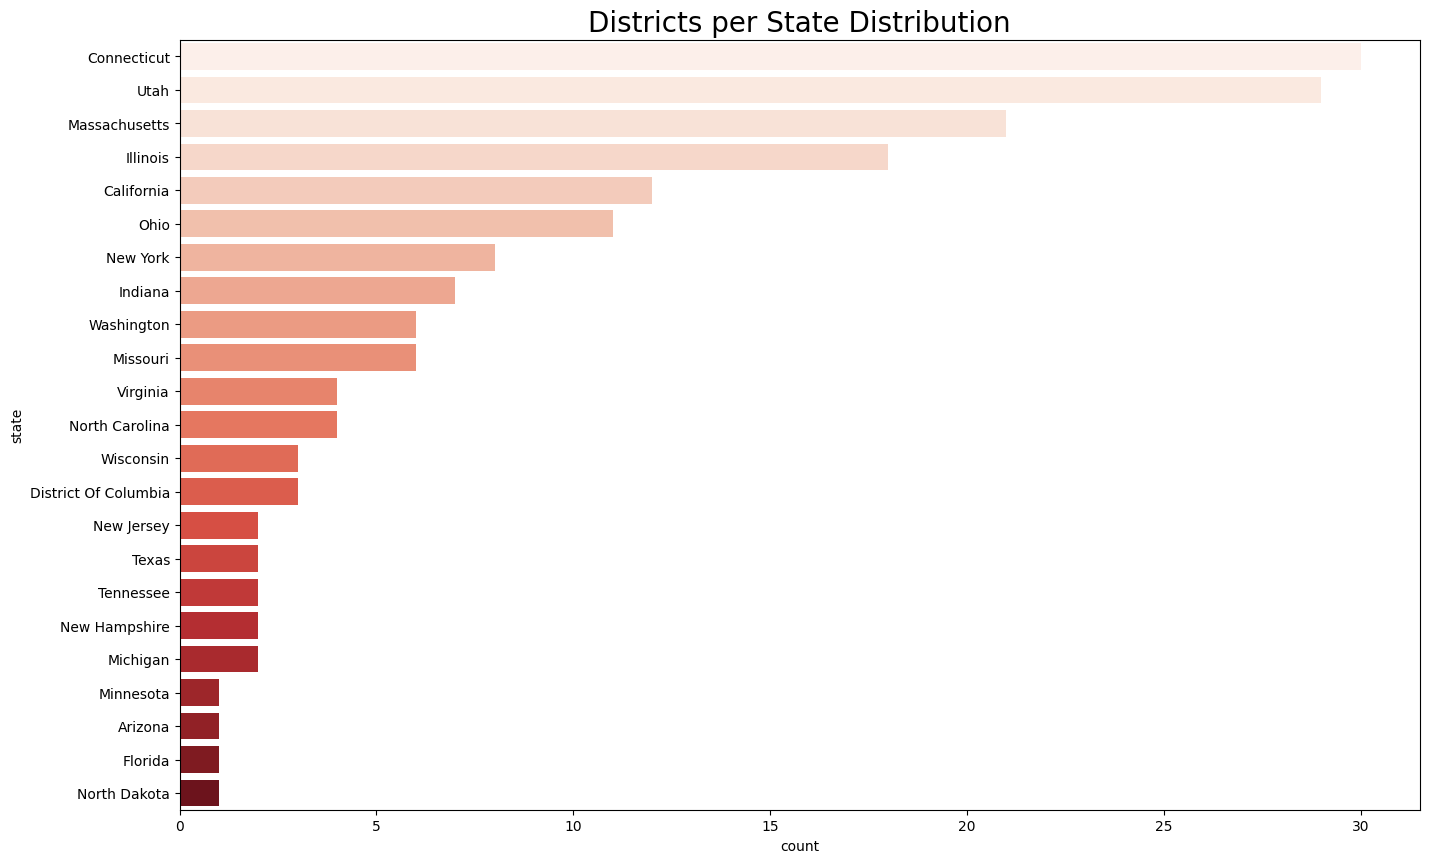

In [19]:
#Districts per State distribution
plt.figure(figsize=(16, 10))
sns.countplot(y="state",data=districts,order=districts.state.value_counts().index, palette="Reds", linewidth=3)
plt.title("Districts per State Distribution", size=20)
plt.show()


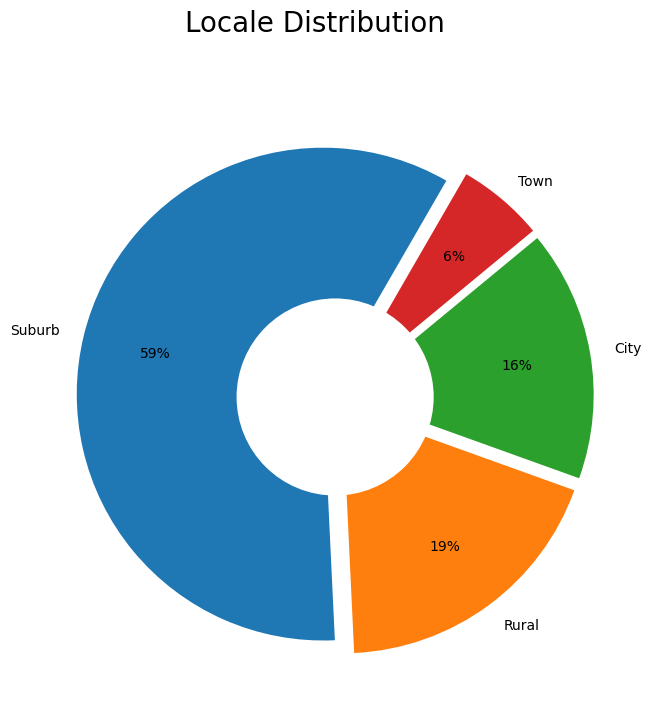

In [20]:
#Locale distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Locale Distribution', size = 20)
explode = (0.05, 0.05, 0.05, 0.05)
labels = list(districts.locale.value_counts().index)
sizes = districts.locale.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

In [21]:
#Ethnicity per State
def percentage_columns(df, col):
    
    lower_limit = []
    upper_limit = []
    
    for index, row in districts.iterrows():
        s = row[col]
        if(not pd.isnull(s)):
            lower_value = s.split(",")[0].split("[")[1]
            upper_value = s.split(",")[1].split("[")[0].strip()
            lower_limit.append(lower_value)
            upper_limit.append(upper_value)
        else:
            lower_limit.append(None)
            upper_limit.append(None)
       
    col_name1 = col + '_lower_limit'
    col_name2 = col + '_upper_limit'
    
    df[col_name1] = pd.to_numeric(lower_limit)
    df[col_name2] = pd.to_numeric(upper_limit)
    
    return df
  
districts_copy = districts.copy()
for col in districts_copy.columns[3:7]:
    districts_copy = percentage_columns(districts_copy, col)
districts_copy = districts_copy.dropna()
    
def filter_state(df,col,state):
    return df[['state','district_id',col]].dropna().loc[df['state']==state]

def display(df, state):
    col1 = 'pct_black/hispanic_upper_limit'
    col2 = 'pct_free/reduced_upper_limit'
    col3 = 'county_connections_ratio_upper_limit'
    col4 = 'pp_total_raw_upper_limit'
    
    df1 = filter_state(df, col1,state)
    df2 = filter_state(df, col2,state)
    df3 = filter_state(df, col3,state)
    df4 = filter_state(df, col4,state)

    fig, ax = plt.subplots(2,2,figsize=(20,20))
    fig.suptitle(state,fontweight='bold',fontsize=30)
    
    sns.countplot(y=col1, data=df1, palette = "Blues", ax=ax[0,0])
    ax[0,0].set_title('% of Black/Hispanic')
    ax[0,0].set_ylabel(None)
    
    sns.countplot(y=col2, data=df2, palette = "Reds", ax=ax[0,1])
    ax[0,1].set_title('% of Eligible for Free/Reduced Lunch Price')
    ax[0,1].set_ylabel(None)
    
    sns.countplot(y=col3, data=df3, palette = "Greens", ax=ax[1,0])
    ax[1,0].set_title('Connection Ratio')
    ax[1,0].set_ylabel(None)
    
    sns.countplot(y=col4, data=df4, palette = "Oranges", ax=ax[1,1])
    ax[1,1].set_title('Per-pupil total expenditure')
    ax[1,1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()


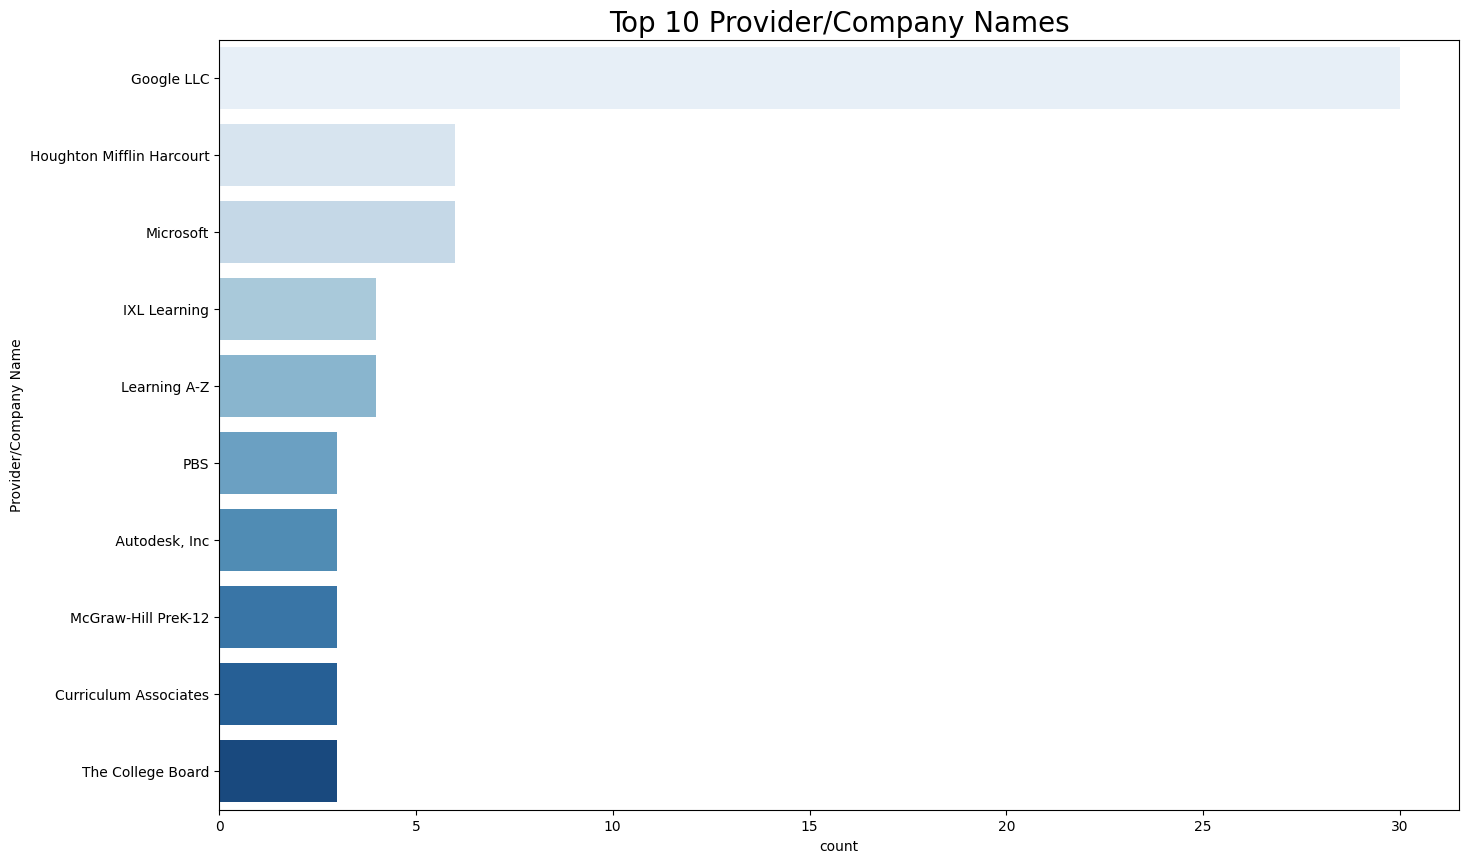

In [22]:
#Top 10 platform providers
plt.figure(figsize=(16, 10))
sns.countplot(y='Provider/Company Name', data=products, order=products["Provider/Company Name"].value_counts().index[:10],palette = "Blues")
plt.title("Top 10 Provider/Company Names", size=20)
plt.show()


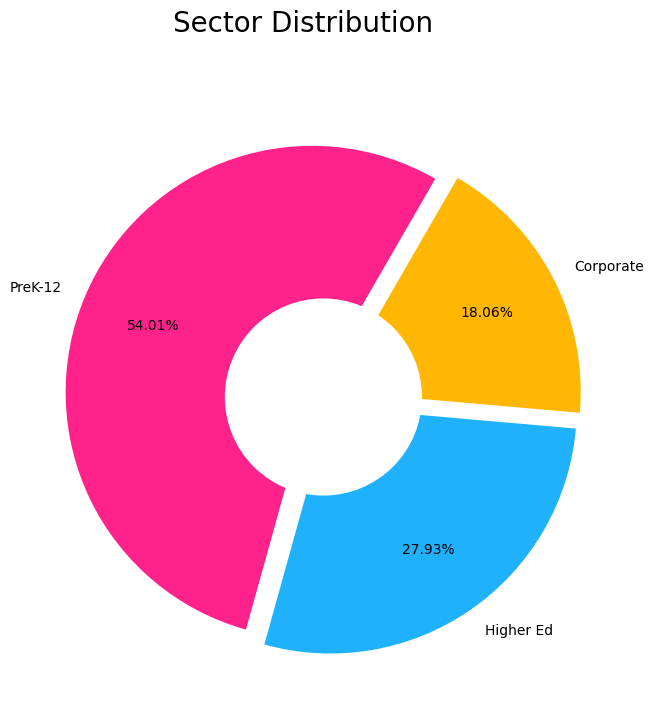

In [23]:
#Sector distribution
c1=c2=c3=0
for s in products["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1

fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Sector Distribution', size = 20)
explode = (0.05, 0.05, 0.05)
labels = ['PreK-12','Higher Ed','Corporate']
sizes = [c1,c2, c3]
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.2f%%', pctdistance=0.7, colors=["#ff228a","#20b1fd","#ffb703"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

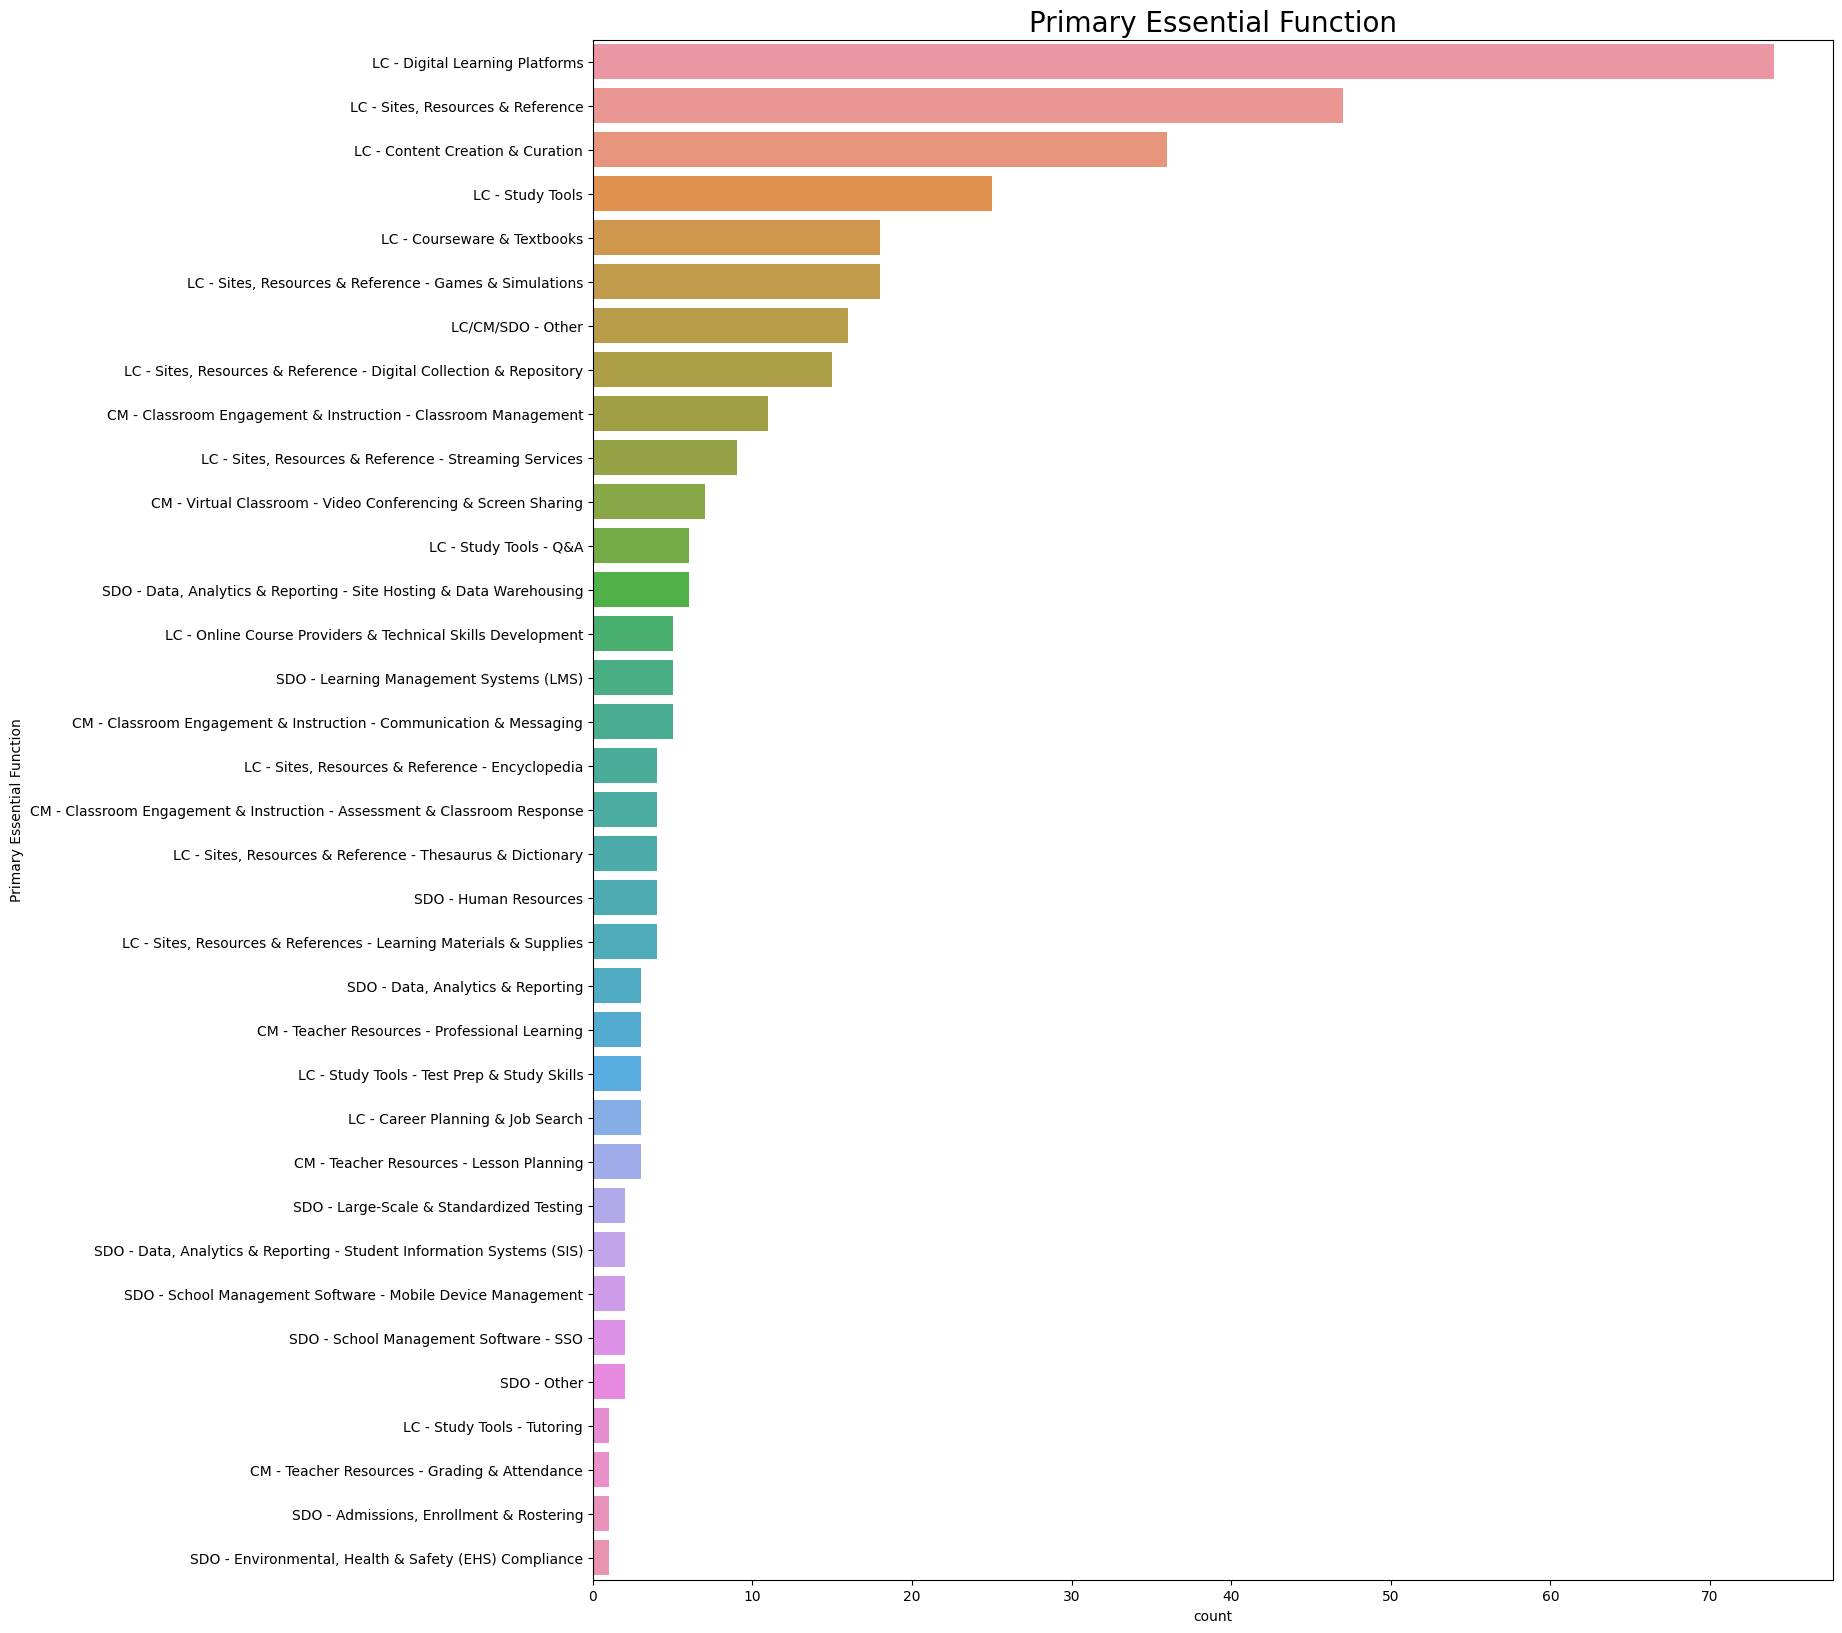

In [24]:
#Primary Essential Functions
plt.figure(figsize=(16, 20))
sns.countplot(y='Primary Essential Function', data=products, order=products["Primary Essential Function"].value_counts().index)
plt.title("Primary Essential Function", size=20)
plt.show()

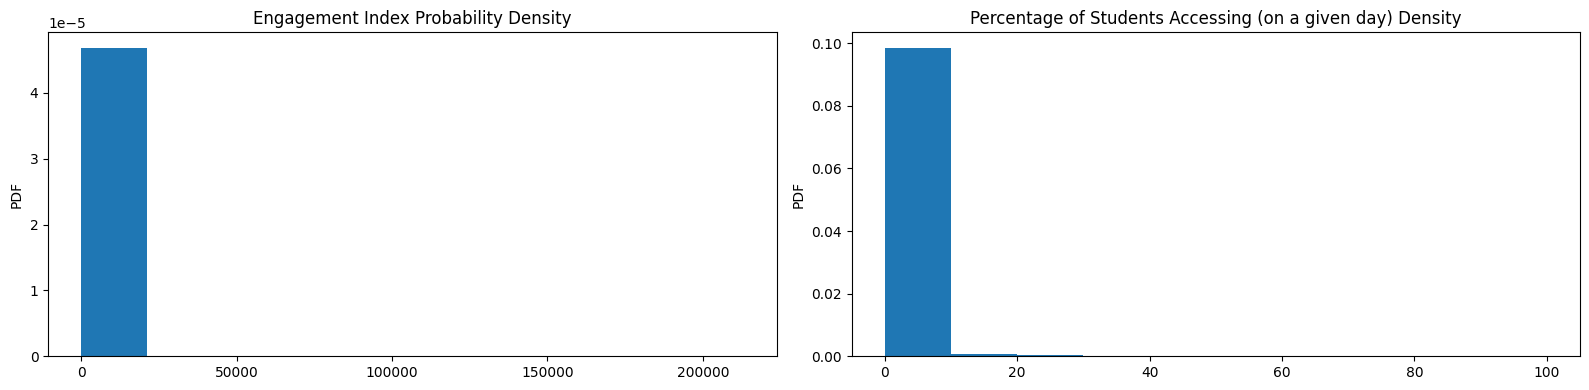

In [25]:
#Engagement Distribution
figure = plt.figure(figsize = (16,4))

ax1 = figure.add_subplot(121)
engagement_product_district.engagement_index.plot.hist(density = True, ax = ax1)
ax1.set_title('Engagement Index Probability Density')
ax1.set_ylabel('PDF')

ax2 = figure.add_subplot(122)
engagement_product_district.pct_access.plot.hist(density = True, ax=ax2)
ax2.set_title('Percentage of Students Accessing (on a given day) Density')
ax2.set_ylabel('PDF')

plt.tight_layout()

In [ ]:
#Engagement by product
figure = plt.figure(figsize = (20,14))
ax1 = figure.add_subplot(221)
pt1 = (engagement_product_district.groupby('Product Name').median()['engagement_index']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax1))
ax1.set_title('Median Engagement Index\nTop 25 Products')
ax1.set_ylabel('Median Engagement Index')

ax2 = figure.add_subplot(222)
pt2 = (engagement_product_district.groupby('Product Name').median()['engagement_index']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax2))
ax2.set_title('Median Engagement Index\nBottom 25 Products')
ax2.set_ylim(ymax=engagement_product_district.groupby('district_id').median()['engagement_index'].max())
# ax2.set_ylabel('Mean Engagement Index')

ax3 = figure.add_subplot(223)
pt3 = (engagement_product_district.groupby('Product Name').median()['pct_access']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax3))
ax3.set_title('Median Percentage of Students Accessing (on a given day)\nTop 25 Products')
ax3.set_ylabel('Median % Students Accessing (on a given day)') 

ax4 = figure.add_subplot(224)
pt4 = (engagement_product_district.groupby('Product Name').median()['pct_access']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax4))
ax4.set_title('Median Percentage of Students Accessing (on a given day)\nBottom 25 Products')
ax4.set_ylim(ymax=engagement_product_district.groupby('district_id').median()['pct_access'].max())
# ax4.set_ylabel('Mean % Students Accessing (on a given day)')

plt.tight_layout()

In [ ]:
#Engagement by District
figure = plt.figure(figsize = (20,14))
ax1 = figure.add_subplot(221)
pt1 = (engagement_product_district.groupby('state').median()['engagement_index']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax1))
ax1.set_title('Median Engagement Index\nTop 25 Districts')
ax1.set_ylabel('Median Engagement Index')

ax2 = figure.add_subplot(222)
pt2 = (engagement_product_district.groupby('state').median()['engagement_index']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax2))
ax2.set_title('Median Engagement Index\nBottom 25 Districts')
ax2.set_ylim(ymax=engagement_product_district.groupby('district_id').median()['engagement_index'].max())
# ax2.set_ylabel('Mean Engagement Index')

ax3 = figure.add_subplot(223)
pt3 = (engagement_product_district.groupby('state').median()['pct_access']
 .sort_values(ascending = False).iloc[:25].plot(kind = 'bar', ax = ax3))
ax3.set_title('Median Percentage of Students Accessing (on a given day)\nTop 25 Districts')
ax3.set_ylabel('Median % Students Accessing (on a given day)') 

ax4 = figure.add_subplot(224)
pt4 = (engagement_product_district.groupby('state').median()['pct_access']
 .sort_values(ascending = False).iloc[-25:].plot(kind = 'bar', ax = ax4))
ax4.set_title('Median Percentage of Students Accessing (on a given day)\nBottom 25 Districts')
ax4.set_ylim(ymax=engagement_product_district.groupby('district_id').median()['pct_access'].max())
# ax4.set_ylabel('Mean % Students Accessing (on a given day)')

plt.tight_layout()

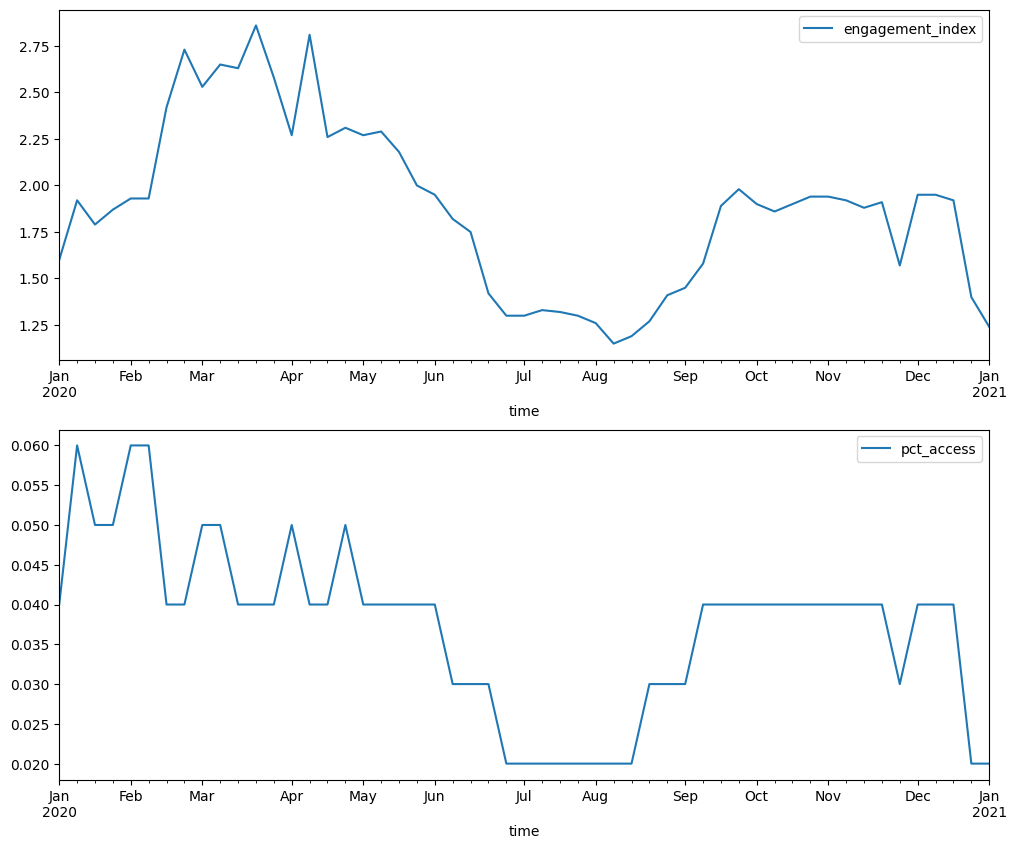

In [29]:
#Engagement Over Time
engagement_product_district['time'] = pd.to_datetime(engagement_product_district['time'], format = '%Y-%m-%d')
figure = plt.figure(figsize=(12,10))
ax1 = figure.add_subplot(211)
(engagement_product_district.groupby(pd.Grouper(key='time', freq='W-MON'))['engagement_index']
       .median()
       .reset_index()
       .sort_values('time')).plot(x='time',y='engagement_index', ax=ax1)

ax2 = figure.add_subplot(212)
(engagement_product_district.groupby(pd.Grouper(key='time', freq='W-MON'))['pct_access']
       .median()
       .reset_index()
       .sort_values('time')).plot(x='time',y='pct_access', ax=ax2)

plt.show()

In [ ]:
#Download to csv file

engagement_product_district.to_csv('engagement_product_district.csv', encoding = 'utf-8-sig') 